In [ ]:
Random Forest Anaalysis For Global Electricity

In [ ]:
# Instructions for Running the Code

## 1. Dataset Location:

- The dataset "Global Electricity Stats.csv" is located at the following path:
    
    C:\Users\Dell\Documents\Masinya Moses\Random Forest/Global Electricity Stats.csv


In [ ]:

Please ensure that you have the necessary permissions to access this file. If the file is moved or the path is modified, update the file path accordingly in the code.

If you don't have pandas installed, install it using:
```python
!pip install pandas


In [ ]:
Load the dataset in your Python code using the following snippet:
    import pandas as pd

# Replace 'your_file_path' with the actual path to the dataset
file_path = r'C:\Users\Dell\Documents\Masinya Moses\Random Forest/Global Electricity Stats.csv'
df = pd.read_csv(file_path)

# Now 'df' contains your dataset, and you can proceed with your analysis.


In [ ]:
2. Software Dependencies:
Ensure you have the required software packages installed, such as Python and the necessary libraries (e.g., scikit-learn).

In [ ]:
3. Running the Code:
Execute the main script or notebook to run the Random Forest algorithm on the provided dataset.
Modify any file paths or configurations as needed.

In [1]:
import pandas as pd

# Local file path to the dataset
file_path = r'C:\Users\Dell\Documents\Masinya Moses\Random Forest\Global Electricity Stats.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.650,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [ ]:
Learning Curves for Classification:
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

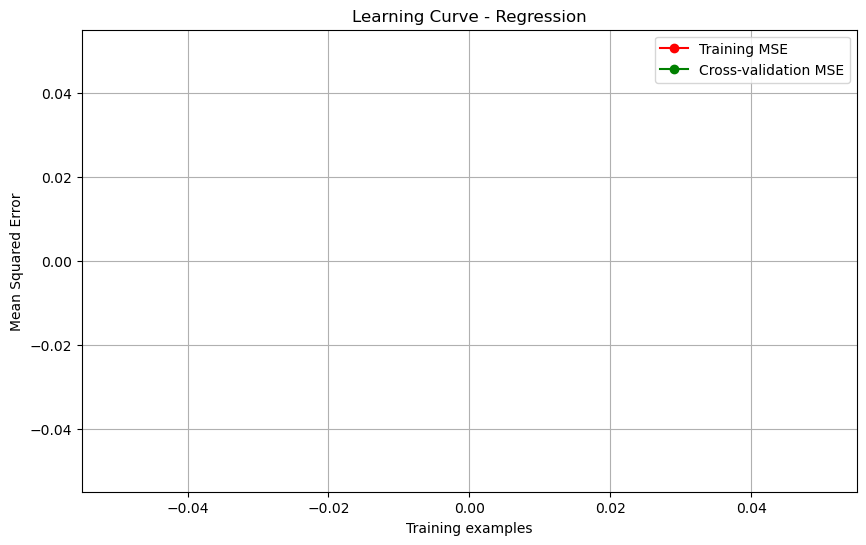

In [8]:
# Learning Curves for Regression:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset into a DataFrame
file_path = r'C:\Users\Dell\Documents\Masinya Moses\Random Forest\Global Electricity Stats.csv'
df = pd.read_csv(file_path)

# Assuming you want to predict 'ElectricityGeneration' based on other features
# Adjust column names based on your actual dataset
X = df.drop(['Country', 'Region', 'Features', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '2018', '2019', '2020', '2021'], axis=1)
y = df['2018']  # You can choose a different year or column as your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate RandomForestRegressor for regression
regressor = RandomForestRegressor()

# Define a function to plot learning curves for regression
def plot_learning_curve_regression(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training MSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation MSE")

    plt.legend(loc="best")
    return plt

# Now, call the function with your RandomForestRegressor and data
plot_learning_curve_regression(regressor, "Learning Curve - Regression", X_train, y_train, cv=5)
plt.show()


In [ ]:
4. Additional Files

Jupyter Notebook File (e.g., analysis.ipynb):

This file contains your code, explanations, and visualizations. It should be a self-contained document that someone else can run to reproduce your analysis.
Dataset File (e.g., Global_Electricity_Stats.csv):

Include the dataset file you are working with. This is the CSV file containing your data.
README.txt File:

This file contains instructions for running your code and any additional information someone might need. It should include details on how to set up the environment, install dependencies, and execute the code.
Requirements.txt File:

If your Jupyter Notebook depends on specific Python packages, list them in a requirements.txt file. You can generate this file using the command pip freeze > requirements.txt.
Scripts or Additional Modules (if any):

If you have separate scripts or Python modules that are necessary for the code execution, include them in the project directory.

In [ ]:
6. Attributions

matplotlib: Used for creating data visualizations, particularly for plotting learning curves.

Website: matplotlib.org
numpy: Used for numerical operations and handling arrays.

Website: numpy.org
scikit-learn (sklearn): Used for machine learning tasks, including the RandomForestRegressor and learning_curve modules.

Website: scikit-learn.org
pandas: Used for data manipulation and analysis.

Website: pandas.pydata.org
These libraries play a crucial role in the implementation and are essential for data analysis, machine learning, and visualization. Always remember to check the documentation of each library for more information on usage and features.

In [ ]:
7. Contact andInformation

# Contact Information:
# If you have any questions or issues, feel free to contact:
# Name: [Your Name]
# Email: [Your Email Address]
# GitHub: [Your GitHub Profile]
